In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_excel("Online Retail.xlsx")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
cat_cols = [features for features in df.columns if df[features].dtypes == 'O']
num_cols = [features for features in df.columns if df[features].dtypes != 'O']
print(cat_cols)
print("")
print(num_cols)

['InvoiceNo', 'StockCode', 'Description', 'Country']

['Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID']


In [6]:
df=df[["CustomerID","InvoiceNo","StockCode","Quantity","UnitPrice","InvoiceDate","Description","Country"]]

In [7]:
df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,InvoiceDate,Description,Country
0,17850.0,536365,85123A,6,2.55,2010-12-01 08:26:00,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
1,17850.0,536365,71053,6,3.39,2010-12-01 08:26:00,WHITE METAL LANTERN,United Kingdom
2,17850.0,536365,84406B,8,2.75,2010-12-01 08:26:00,CREAM CUPID HEARTS COAT HANGER,United Kingdom
3,17850.0,536365,84029G,6,3.39,2010-12-01 08:26:00,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom
4,17850.0,536365,84029E,6,3.39,2010-12-01 08:26:00,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom


In [8]:
df.isnull().sum()

CustomerID     135080
InvoiceNo           0
StockCode           0
Quantity            0
UnitPrice           0
InvoiceDate         0
Description      1454
Country             0
dtype: int64

In [9]:
df.dropna(subset=["CustomerID"], inplace=True)


In [10]:
df["TotalPrice"]=df["Quantity"]*df["UnitPrice"]

In [11]:
df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,InvoiceDate,Description,Country,TotalPrice
0,17850.0,536365,85123A,6,2.55,2010-12-01 08:26:00,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,15.30
1,17850.0,536365,71053,6,3.39,2010-12-01 08:26:00,WHITE METAL LANTERN,United Kingdom,20.34
2,17850.0,536365,84406B,8,2.75,2010-12-01 08:26:00,CREAM CUPID HEARTS COAT HANGER,United Kingdom,22.00
3,17850.0,536365,84029G,6,3.39,2010-12-01 08:26:00,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom,20.34
4,17850.0,536365,84029E,6,3.39,2010-12-01 08:26:00,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom,20.34


In [12]:
df=df[["CustomerID","InvoiceNo","StockCode","Quantity","UnitPrice","TotalPrice","InvoiceDate","Description","Country"]]

In [13]:
df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,TotalPrice,InvoiceDate,Description,Country
0,17850.0,536365,85123A,6,2.55,15.30,2010-12-01 08:26:00,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
1,17850.0,536365,71053,6,3.39,20.34,2010-12-01 08:26:00,WHITE METAL LANTERN,United Kingdom
2,17850.0,536365,84406B,8,2.75,22.00,2010-12-01 08:26:00,CREAM CUPID HEARTS COAT HANGER,United Kingdom
3,17850.0,536365,84029G,6,3.39,20.34,2010-12-01 08:26:00,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom
4,17850.0,536365,84029E,6,3.39,20.34,2010-12-01 08:26:00,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom


In [14]:
Customer_spend=df.groupby("CustomerID")["TotalPrice"].sum().reset_index()

In [15]:
Customer_spend

,CustomerID,TotalPrice
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [16]:
Customer_Freq=df.groupby("CustomerID")["InvoiceNo"].count().reset_index()

In [17]:
Customer_Freq=Customer_Freq.rename(columns={"InvoiceNo":"Freq"})

In [18]:
Customer_Freq

,CustomerID,Freq
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


In [19]:
Customer_Details=pd.merge(Customer_Freq,Customer_spend,on="CustomerID")

In [20]:
Customer_Details

,CustomerID,Freq,TotalPrice
0,12346.0,2,0.00
1,12347.0,182,4310.00
2,12348.0,31,1797.24
3,12349.0,73,1757.55
4,12350.0,17,334.40
...,...,...,...
4367,18280.0,10,180.60
4368,18281.0,7,80.82
4369,18282.0,13,176.60
4370,18283.0,756,2094.88


In [21]:
import datetime as dt

In [22]:
max_date=max(df["InvoiceDate"])

In [23]:
max_date

Timestamp('2011-12-09 12:50:00')

In [24]:
df["Giris_Aralığı"]=max_date-df["InvoiceDate"]

In [25]:
df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,TotalPrice,InvoiceDate,Description,Country,Giris_Aralığı
0,17850.0,536365,85123A,6,2.55,15.30,2010-12-01 08:26:00,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,373 days 04:24:00
1,17850.0,536365,71053,6,3.39,20.34,2010-12-01 08:26:00,WHITE METAL LANTERN,United Kingdom,373 days 04:24:00
2,17850.0,536365,84406B,8,2.75,22.00,2010-12-01 08:26:00,CREAM CUPID HEARTS COAT HANGER,United Kingdom,373 days 04:24:00
3,17850.0,536365,84029G,6,3.39,20.34,2010-12-01 08:26:00,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom,373 days 04:24:00
4,17850.0,536365,84029E,6,3.39,20.34,2010-12-01 08:26:00,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom,373 days 04:24:00


In [26]:
son_giris=df.groupby("CustomerID")["Giris_Aralığı"].min().reset_index()

In [27]:
son_giris["Giris_Aralığı"]=son_giris["Giris_Aralığı"].dt.days

In [28]:
son_giris

,CustomerID,Giris_Aralığı
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309
...,...,...
4367,18280.0,277
4368,18281.0,180
4369,18282.0,7
4370,18283.0,3


In [29]:
Customer_Details=pd.merge(Customer_Details,son_giris,on="CustomerID")

In [30]:
Customer_Details

,CustomerID,Freq,TotalPrice,Giris_Aralığı
0,12346.0,2,0.00,325
1,12347.0,182,4310.00,1
2,12348.0,31,1797.24,74
3,12349.0,73,1757.55,18
4,12350.0,17,334.40,309
...,...,...,...,...
4367,18280.0,10,180.60,277
4368,18281.0,7,80.82,180
4369,18282.0,13,176.60,7
4370,18283.0,756,2094.88,3


In [31]:
Customer_Details=Customer_Details.rename(columns={"Giris_Aralığı":"Son_Giris"})

In [32]:
Customer_Details

,CustomerID,Freq,TotalPrice,Son_Giris
0,12346.0,2,0.00,325
1,12347.0,182,4310.00,1
2,12348.0,31,1797.24,74
3,12349.0,73,1757.55,18
4,12350.0,17,334.40,309
...,...,...,...,...
4367,18280.0,10,180.60,277
4368,18281.0,7,80.82,180
4369,18282.0,13,176.60,7
4370,18283.0,756,2094.88,3


In [33]:
z = Customer_Details.TotalPrice.quantile(0.05)
y =Customer_Details.TotalPrice.quantile(0.95)
aykırı_degerler=y-z

In [34]:
Customer_Details=Customer_Details[(Customer_Details["TotalPrice"]>=z-1.5*aykırı_degerler)&(Customer_Details["TotalPrice"]<=y+1.5*aykırı_degerler)]

In [35]:
Customer_Details

,CustomerID,Freq,TotalPrice,Son_Giris
0,12346.0,2,0.00,325
1,12347.0,182,4310.00,1
2,12348.0,31,1797.24,74
3,12349.0,73,1757.55,18
4,12350.0,17,334.40,309
...,...,...,...,...
4367,18280.0,10,180.60,277
4368,18281.0,7,80.82,180
4369,18282.0,13,176.60,7
4370,18283.0,756,2094.88,3


In [36]:
a = Customer_Details.Freq.quantile(0.05)
b =Customer_Details.Freq.quantile(0.95)
aykırı_degerler2=b-a

In [37]:
Customer_Details=Customer_Details[(Customer_Details["Freq"]>=a-1.5*aykırı_degerler2)&(Customer_Details["Freq"]<=b+1.5*aykırı_degerler2)]

In [38]:
c = Customer_Details.Freq.quantile(0.05)
d =Customer_Details.Freq.quantile(0.95)
aykırı_degerler3=d-c

In [39]:
Customer_Details=Customer_Details[(Customer_Details["Son_Giris"]>=c-1.5*aykırı_degerler3)&(Customer_Details["Son_Giris"]<=d+1.5*aykırı_degerler3)]

In [40]:
Customer_Details

,CustomerID,Freq,TotalPrice,Son_Giris
0,12346.0,2,0.00,325
1,12347.0,182,4310.00,1
2,12348.0,31,1797.24,74
3,12349.0,73,1757.55,18
4,12350.0,17,334.40,309
...,...,...,...,...
4366,18278.0,9,173.90,73
4367,18280.0,10,180.60,277
4368,18281.0,7,80.82,180
4369,18282.0,13,176.60,7


In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler=StandardScaler()

In [43]:
scaled=scaler.fit_transform(Customer_Details[["Freq","TotalPrice","Son_Giris"]])

In [44]:
scaled.shape

(4293, 3)

In [45]:
scaled_values=pd.DataFrame(scaled)

In [46]:
scaled_values.columns=["Freq","TotalPrice","Son_Giris"]

In [47]:
scaled_values

,Freq,TotalPrice,Son_Giris
0,-0.752888,-0.723738,2.301611
1,1.042467,1.731617,-0.906466
2,-0.463636,0.300128,-0.183658
3,-0.044720,0.277517,-0.738141
4,-0.603275,-0.533235,2.143188
...,...,...,...
4288,-0.683068,-0.624669,-0.193560
4289,-0.673094,-0.620853,1.826341
4290,-0.703017,-0.677696,0.865898
4291,-0.643171,-0.623131,-0.847057


In [48]:
from sklearn.cluster import KMeans

In [49]:
scores=[]
for i in range(2,7):
    kmeans=KMeans(n_clusters=i,max_iter=40,verbose=True).fit(scaled_values)
    scores.append(kmeans.inertia_)

Initialization complete
Iteration 0, inertia 14000.44320912533
Iteration 1, inertia 10059.794860717622
Iteration 2, inertia 8808.680380003965
Iteration 3, inertia 8712.379002414214
Iteration 4, inertia 8705.955544825882
Iteration 5, inertia 8703.935987114124
Iteration 6, inertia 8703.508692924137
Converged at iteration 6: center shift 9.3804075385157e-06 within tolerance 9.999999999999983e-05.
Initialization complete
Iteration 0, inertia 16248.700357002903
Iteration 1, inertia 7686.821714535622
Iteration 2, inertia 7675.634245133249
Iteration 3, inertia 7667.801953258941
Iteration 4, inertia 7663.343111450159
Iteration 5, inertia 7662.2545737530245
Iteration 6, inertia 7662.014676732945
Converged at iteration 6: center shift 2.607860501681306e-05 within tolerance 9.999999999999983e-05.
Initialization complete
Iteration 0, inertia 12136.228945495082
Iteration 1, inertia 10725.523169192189
Iteration 2, inertia 10548.049368360385
Iteration 3, inertia 10485.796877547136
Iteration 4, inerti

Iteration 7, inertia 3360.7268910236344
Iteration 8, inertia 3360.5229565303453
Converged at iteration 8: center shift 6.5968224848066235e-06 within tolerance 9.999999999999983e-05.
Initialization complete
Iteration 0, inertia 5775.0975136659445
Iteration 1, inertia 3765.9978950845484
Iteration 2, inertia 3536.7503254299463
Iteration 3, inertia 3495.5688642102814
Iteration 4, inertia 3474.869439090128
Iteration 5, inertia 3445.923792161151
Iteration 6, inertia 3421.288357361458
Iteration 7, inertia 3398.078389994012
Iteration 8, inertia 3380.8955839757555
Iteration 9, inertia 3371.7037946019577
Iteration 10, inertia 3366.0950539121254
Iteration 11, inertia 3364.12355500916
Iteration 12, inertia 3362.8280425949106
Iteration 13, inertia 3362.114265381916
Iteration 14, inertia 3361.690917188319
Iteration 15, inertia 3361.4089461950016
Iteration 16, inertia 3361.299415248483
Iteration 17, inertia 3361.2473491495416
Converged at iteration 17: strict convergence.
Initialization complete
Iter

Iteration 9, inertia 2465.5485130710313
Iteration 10, inertia 2464.079425530177
Iteration 11, inertia 2462.5840185977686
Iteration 12, inertia 2461.2735404459204
Iteration 13, inertia 2459.8936355499104
Iteration 14, inertia 2458.695370010559
Iteration 15, inertia 2457.428395330053
Iteration 16, inertia 2456.3448793581224
Iteration 17, inertia 2455.3769519975044
Iteration 18, inertia 2454.7142921452755
Iteration 19, inertia 2454.163244480591
Iteration 20, inertia 2453.4510777913747
Iteration 21, inertia 2452.845835879556
Iteration 22, inertia 2452.5052693028665
Iteration 23, inertia 2451.859144693175
Iteration 24, inertia 2451.1276380083277
Iteration 25, inertia 2450.7771091179775
Converged at iteration 25: center shift 8.977695124139218e-05 within tolerance 9.999999999999983e-05.
Initialization complete
Iteration 0, inertia 2992.175819583509
Iteration 1, inertia 2596.0916770396616
Iteration 2, inertia 2563.5131518072512
Iteration 3, inertia 2546.1566601572995
Iteration 4, inertia 2531

In [50]:
len(scores)

5

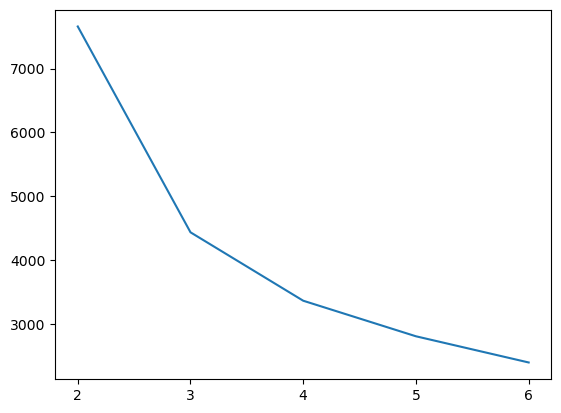

In [51]:
plt.plot(range(2,7,1),scores)
plt.xticks(ticks=range(2,7))
plt.show()

In [52]:
from sklearn.metrics import silhouette_score

In [53]:
for i in range(2,7):
    kmeans=KMeans(n_clusters=i,max_iter=40).fit(scaled_values)
    cluster_labels=kmeans.labels_
    silhouette_avg=silhouette_score(scaled_values,cluster_labels)
    print("For n_cluster{} the silhouette_score is{}".format(i,silhouette_avg))

For n_cluster2 the silhouette_score is0.5415858652525395
For n_cluster3 the silhouette_score is0.5084896296141937
For n_cluster4 the silhouette_score is0.48199592314697204
For n_cluster5 the silhouette_score is0.46627005641897035
For n_cluster6 the silhouette_score is0.41773142554966397


In [54]:
kmeans=KMeans(n_clusters=3,max_iter=50).fit(scaled_values)
clusters=kmeans.labels_

In [55]:
Customer_Details["Cluster"]=clusters

In [56]:
Customer_Details 

,CustomerID,Freq,TotalPrice,Son_Giris,Cluster
0,12346.0,2,0.00,325,1
1,12347.0,182,4310.00,1,2
2,12348.0,31,1797.24,74,0
3,12349.0,73,1757.55,18,0
4,12350.0,17,334.40,309,1
...,...,...,...,...,...
4366,18278.0,9,173.90,73,0
4367,18280.0,10,180.60,277,1
4368,18281.0,7,80.82,180,1
4369,18282.0,13,176.60,7,0


<AxesSubplot:xlabel='Cluster', ylabel='TotalPrice'>

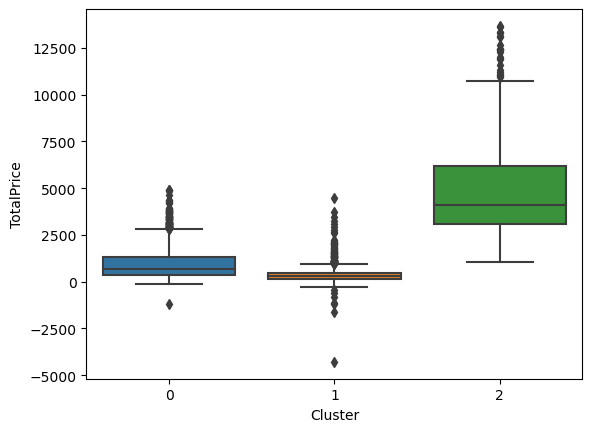

In [57]:
sns.boxplot(x="Cluster",y="TotalPrice",data=Customer_Details)

<AxesSubplot:xlabel='Cluster', ylabel='Son_Giris'>

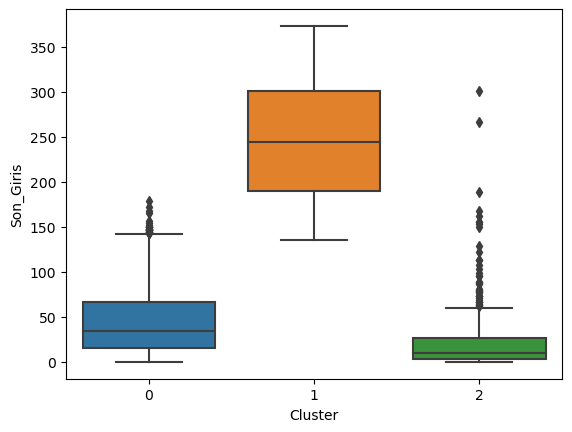

In [58]:
sns.boxplot(x="Cluster",y="Son_Giris",data=Customer_Details)

<AxesSubplot:xlabel='Cluster', ylabel='Freq'>

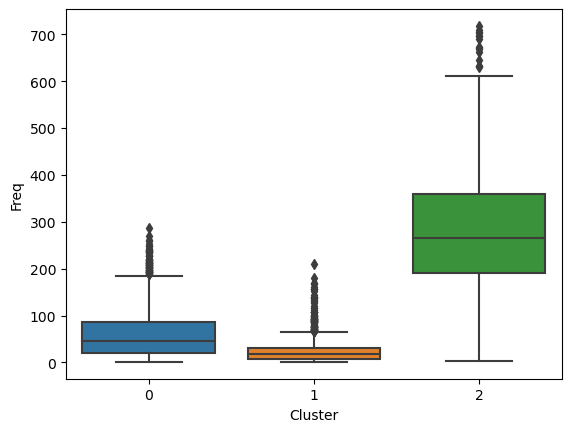

In [59]:
sns.boxplot(x="Cluster",y="Freq",data=Customer_Details)